# Lab 2 - Classification

## 1. Introduction


In this lab, we explore **supervised learning** with a focus on **classification problems**, where the task is to predict discrete class labels based on input features. We will implement and analyze several widely used **classification models** including Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree, Random Forest, Support Vector Machine (SVM), and Naive Bayes. Each model will be trained on labeled data and evaluated using key **performance metrics** such as accuracy, precision, recall, F1-score, confusion matrix, ROC curve, and AUC score. Furthermore, we will apply **hyperparameter tuning** techniques to optimize the performance of our models, using methods like grid search and cross-validation. Through this lab, you will develop a deeper understanding of building classification models, interpreting their results, evaluating their effectiveness, and improving them through careful tuning and validation.


### What is Supervised Learning?

**Supervised learning** is a type of machine learning where a model is trained on a labeled dataset, meaning that for each input, the correct output is already known. The goal is for the model to learn the relationship between inputs and outputs, so it can predict the correct output for new, unseen data. 

For example, in a spam detection system, the model is trained using thousands of emails that are already labeled as *"spam"* or *"not spam"*. By learning from the patterns in these labeled examples - like specific words or email structures - the model becomes able to classify new incoming emails as either spam or not spam without needing human input. 
In supervised learning, the model improves by minimizing the error between its predictions and the actual labels during training.

Extra Sources: [Google Cloud](https://cloud.google.com/discover/what-is-supervised-learning#:~:text=Supervised%20learning%20is%20a%20category,the%20input%20and%20the%20outputs.), [IBM](https://www.ibm.com/think/topics/supervised-learning)






### What is a Classification Problem in Machine Learning?

**Classification** is a type of supervised learning problem in machine learning where the goal is to assign an input to one of several predefined categories or classes. The model learns from a labeled dataset, where each input is already associated with the correct class, and aims to predict the correct class for new, unseen inputs. Classification is used when the output is **discrete** - meaning it belongs to a set of distinct groups.
In simple terms, classification answers the question: *"Which category does this input belong to?"*


## 2. Setup

In [1]:
#Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import numpy as np

### What is a Seed in Machine Learning?

In machine learning and data science, many operations involve some form of randomness - such as splitting datasets, initializing model weights, or shuffling data. 

To make results **reproducible**, we set a **random seed**. This seed is a number that initializes the pseudo-random number generator used by libraries like NumPy (<code>[numpy.random.seed](https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html)</code>), or random (<code>[random.seed](https://docs.python.org/3/library/random.html#random.seed)</code>), or any other library that uses randomness.

By fixing the seed, we ensure that:
- the same random numbers are generated,
- results (like train/test splits or model performance) remain consistent across runs.

In [2]:
seed = 42

np.random.seed(seed)

In [3]:
#Uploading Data
import os
data_file_path= os.path.join('data','my_titanic.csv')
data=pd.read_csv(data_file_path)
data.head()

,pclass_preprocess__Pclass,sex_preprocess__Sex_male,age_preprocess__Age,sibsp_parch_preprocess__FamilySize,embarked_preprocess__Embarked_Q,embarked_preprocess__Embarked_S,fare_preprocess__Fare,Survived
0,2.0,1.0,0.271174,2.0,0.0,1.0,-0.501758,0
1,0.0,0.0,0.472229,2.0,0.0,0.0,0.786629,1
2,2.0,0.0,0.321438,1.0,0.0,1.0,-0.488176,1
3,0.0,0.0,0.434531,2.0,0.0,1.0,0.420770,1
4,2.0,1.0,0.434531,1.0,0.0,1.0,-0.485661,0


### Why Do We Split Data into Train, Validation, and Test Sets?

In supervised machine learning, we aim to build models that generalize well to **unseen data**. To evaluate and tune models effectively, we split our dataset into three parts:

---

#### 1. **Training Set**
- **Purpose**: Used to train the model — it "learns" from this data.
- The model adjusts its internal parameters (like weights) using this subset.
- Usually 80% of the total dataset.


#### 2. **Validation Set**
- **Purpose**: Used to tune hyperparameters and monitor the model’s performance during training.
- It helps prevent **overfitting** to the training data.
- Used in early stopping or model selection.
- Usually 10% of the dataset.


#### 3. **Test Set**
- **Purpose**: Used **only at the end** to evaluate the final model’s performance.
- It gives an **unbiased estimate** of how well the model will perform on real-world, unseen data.
- Usually 10% of the dataset.

![types-of-data-img](img/train_val_test_split.png)


In [4]:
#Making Train Test Split
X=data.drop(columns="Survived")
y=data.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=seed)

print("Train set size: ", X_train.shape[0])
print("Validation set size: ", X_validation.shape[0])
print("Test set size: ", X_test.shape[0])


Train set size:  709
Validation set size:  89
Test set size:  89


### Why is this important?

If we train and test on the same data:
- We may get misleadingly high performance.
- The model may **memorize** rather than **generalize**, incurring in the so called **overfitting**.
- We can't reliably tell how it will behave in production or on new inputs.

Using separate splits ensures that:
- We evaluate on truly unseen data,
- We don’t accidentally optimize for the test set (data leakage),
- We build models that perform well in the real world.

![types-of-data-img](img/overfitting.png)



## 3. Training Different Models

### Logistic Regression

<code>[LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)</code> is a supervised learning algorithm used for **classification tasks**. Despite its name, it is actually a classification model rather than a regression model.

The main idea of logistic regression is to model the probability that a given input belongs to a particular class. It uses the **logistic (sigmoid) function** to map any real-valued number into a value between 0 and 1, representing probability.

The model predicts probabilities and then classifies inputs by applying a threshold (usually 0.5).  
- If the predicted probability is greater than 0.5, it classifies the input as **class 1**.
- Otherwise, it classifies the input as **class 0**.

### Mathematical Formulation

The logistic (sigmoid) function is:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

where 

$$
z = w_0 + w_1x_1 + w_2x_2 + \cdots + w_nx_n
$$

is a linear combination of the input features.

## When to Use Logistic Regression
- Binary classification (e.g., spam vs. not spam)

- Here, differently from linear regression, we are interested in the **probability** of class membership rather than the mean squared error.


![types-of-data-img](img/linear_logistic_regression.png)


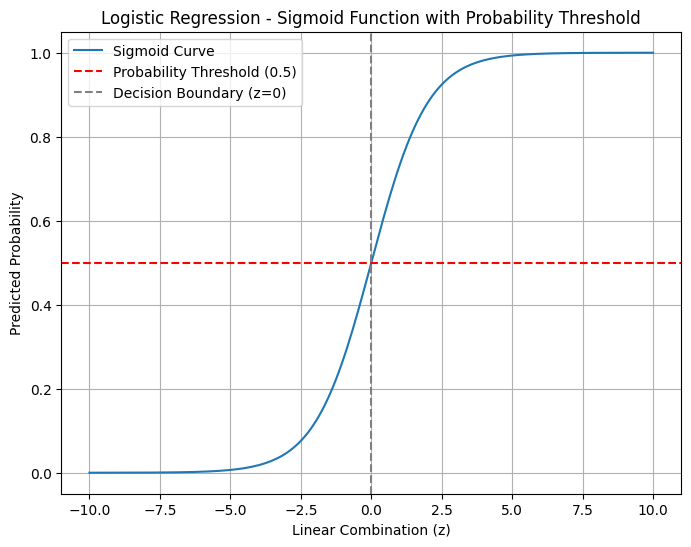

In [5]:
#Training Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [6]:
#Getting Predictions from Model
y_pred = model.predict(X_validation)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0])

In [7]:
#Getting Probabilities of each test data (if it is higher than 0.5 it is counted as Survived)
y_proba = model.predict_proba(X_validation)
y_proba[:10]

array([[0.89773271, 0.10226729],
       [0.07751747, 0.92248253],
       [0.83131114, 0.16868886],
       [0.29993568, 0.70006432],
       [0.8132775 , 0.1867225 ],
       [0.35910196, 0.64089804],
       [0.61860162, 0.38139838],
       [0.15521732, 0.84478268],
       [0.41206307, 0.58793693],
       [0.07645717, 0.92354283]])

### Feature Importance 

**Feature importance** refers to techniques that assign a score to each input feature based on how useful it is at predicting the target variable. 

In linear models (like Logistic Regression or Linear Regression), the scores are the model’s coefficients, which can be positive or negative, indicating both the direction and strength of a feature’s influence on the prediction. A **positive coefficient** means the feature increases the likelihood of predicting a higher target value (e.g., class 1), while a **negative coefficient** means the feature pushes the prediction toward a lower target value (e.g., class 0). 

A larger absolute value - whether positive or negative - means the feature has a stronger impact. By analyzing feature importance, we can interpret the model’s behavior, identify the most influential features, simplify models by removing weak features, and gain insights into the relationships in the data.

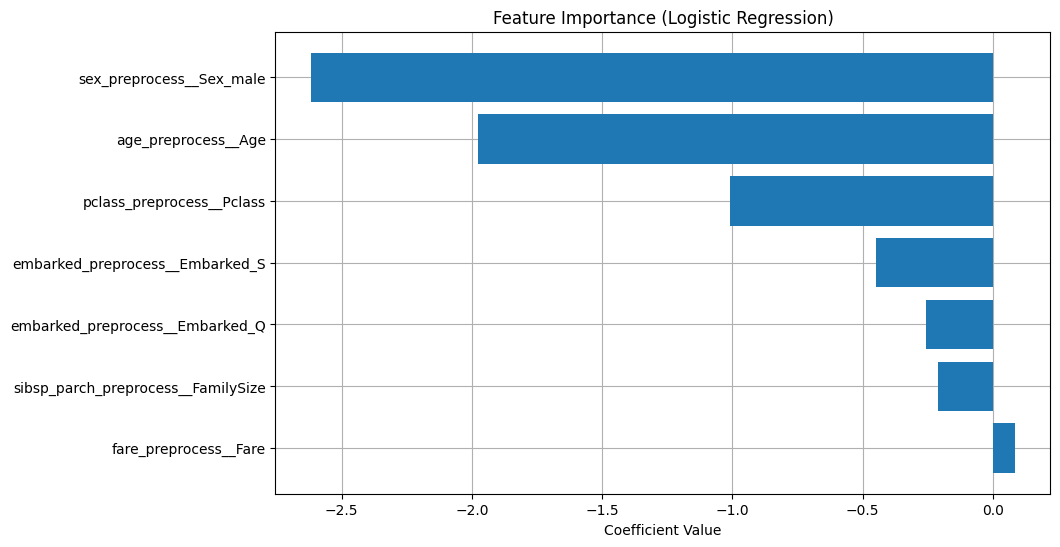

In [8]:
import matplotlib.pyplot as plt

features=list(X_train.columns)
importance = model.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importance
})

feature_importance['Absolute Importance'] = feature_importance['Importance'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Importance', ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(feature_importance['Feature'], feature_importance['Importance'])

ax.set_xlabel('Coefficient Value')
ax.set_title('Feature Importance (Logistic Regression)')

ax.invert_yaxis()
ax.set_axisbelow(True)
ax.grid(True)
plt.show()


### K-Nearest Neighbors (KNN)

<code>[KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)</code> (KNN) is a simple, powerful, and intuitive supervised learning algorithm used for **classification** and **regression** tasks. In KNN, the idea is to classify a new data point based on the labels of its **'k' nearest neighbors** in the training data.

Unlike many other algorithms, KNN **does not build an explicit model** during training. Instead, it memorizes the training dataset and makes decisions **only at prediction time**, which is why KNN is sometimes called a **lazy learning algorithm**.



### How KNN Works (for Classification)

1. **Choose the number of neighbors** \( k \) (e.g., \( k = 3 \)).
2. **Compute the distance** between the new point and all training data points.
   - Common distance metrics: **Euclidean distance**, **Manhattan distance**.
3. **Select the k closest points** (neighbors) based on the calculated distances.
4. **Assign the most common class label** among the \( k \) neighbors to the new point.



### Key Points:
- **Small \( k \)** (e.g., 1 or 3) can make the model sensitive to noise (overfitting).
- **Large \( k \)** smoothens the decision boundaries but can cause underfitting.
- KNN assumes that **similar points are close** in feature space.
- KNN can work with multiple classes (multiclass classification).



### Example Visualization

In the figure below:
- **Blue points** belong to **Class 0**.
- **Red points** belong to **Class 1**.
- A **green X** represents a **new data point** we want to classify.

To classify the green point:
- We compute its distance to all training points.
- Find the \( k \) closest ones (for example, 3 nearest neighbors).
- The most frequent class among these neighbors is assigned to the green point.

The visual intuition shows that KNN is a **proximity-based method**: closer points influence the prediction more strongly. In simple words: *"KNN looks at the closest neighbors and "votes" to decide the class of a new point!"*


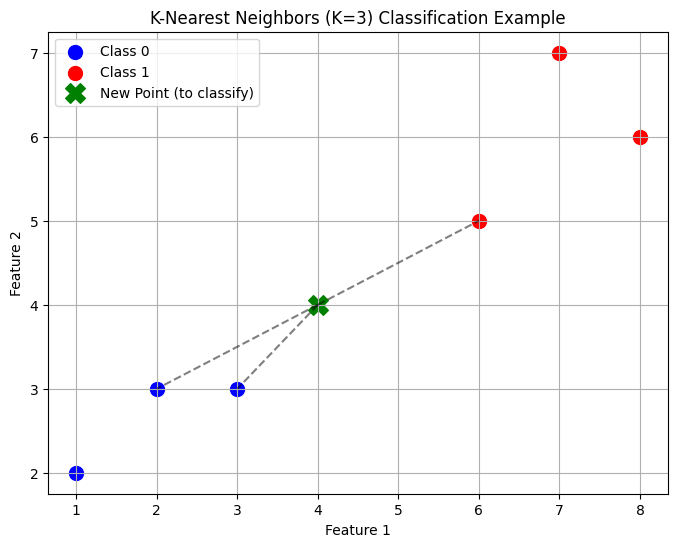

In [9]:
#Training KNN Model

knn = KNeighborsClassifier(n_neighbors=5)  # We will use 5 neighbors
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [10]:
y_pred = knn.predict(X_test) # Prediction of the models
y_pred[:10]

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0])

# Decision Trees

<code>[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)</code> are supervised learning models used for both **classification** and **regression** tasks. They work by splitting the data into subsets based on feature values, following a structure that looks like a flowchart: each internal node tests a feature, each branch represents a decision outcome, and each leaf node assigns a prediction.

At each node, the algorithm chooses the feature and threshold that best splits the data according to some criterion (like **Gini impurity** or **Information Gain**).

---

## Key Points:
- Easy to interpret and visualize.
- Can handle both numerical and categorical data.
- Prone to **overfitting** if not properly controlled (e.g., limiting the depth).

In simple words: *A Decision Tree splits the dataset into smaller and smaller groups based on feature values, until it can make a decision (prediction) at the leaf.*


In [ ]:
#Train the Decision Tree Classifier
model = DecisionTreeClassifier(
    criterion='gini',     # or use 'entropy' for Information Gain
    max_depth=3,          # limit tree depth to avoid overfitting, it limits depth of the tree (it shouldn't exceeed logical limits or the tree becomes hard to traverse for visual justifications)
    random_state=seed
)

model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [12]:
y_pred = model.predict(X_test)
y_pred[:10]

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0])

In [13]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(model,
                           out_file=None,
                           feature_names=X_train.columns,
                           class_names=model.classes_.astype(str),
                           filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("img/tree")

'img/tree.pdf'

### Random Forests


<code>[RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)</code> is an ensemble machine learning method that combines the outputs of many individual decision trees to create a stronger and more robust model. 

It works by training each tree on a random subset of the data (using bootstrap sampling) and selecting a random subset of features at each split, which helps to reduce overfitting and make the trees less correlated with each other. **It is called "Random" Forest because both the training data and the features are randomly sampled when building each tree**, introducing diversity among the trees and improving the overall generalization performance. 

In classification tasks, Random Forest predicts by majority voting across the trees. The use of randomness and multiple trees helps Random Forest achieve better accuracy, lower variance, and greater resistance to noisy data compared to a single decision tree. Random Forests can also measure feature importance, providing insights into which variables are most influential for the model’s predictions. Although the ensemble is less interpretable than a single tree, Random Forest is a powerful and reliable method widely used in practice.



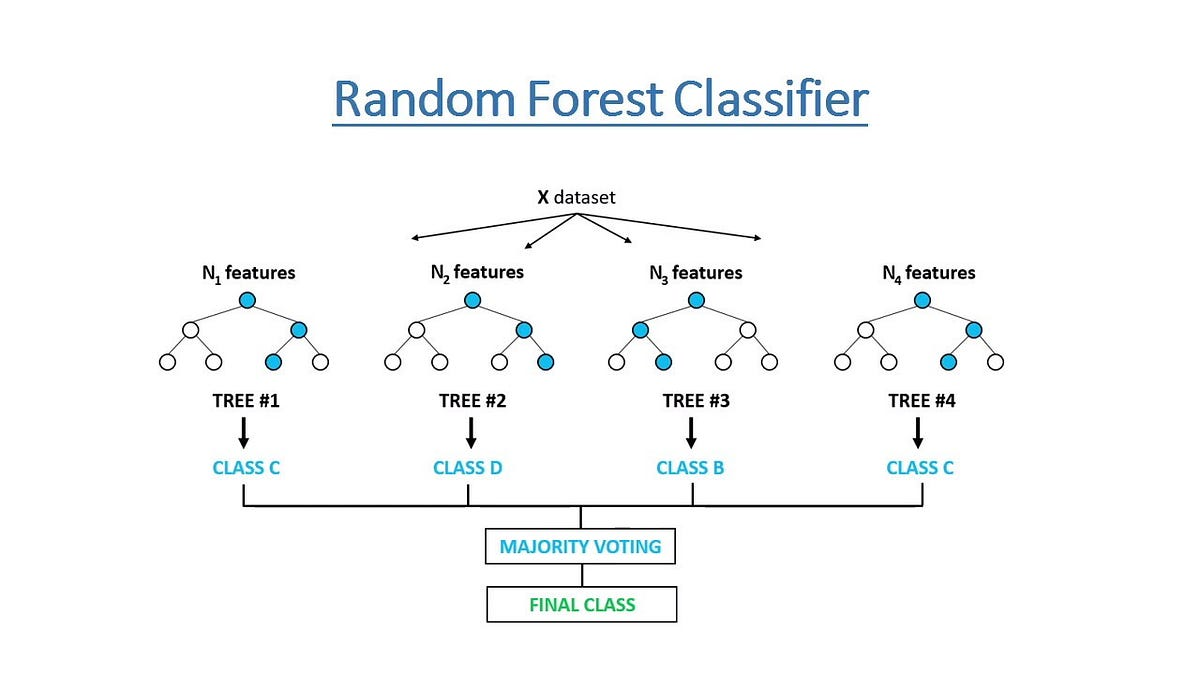


In [15]:
#Train the Random Forest Classifier
model = RandomForestClassifier(
    n_estimators=100,    # number of trees in the forest
    max_depth=None,      # trees will expand until all leaves are pure or until all leaves contain less than min_samples_split samples
    random_state=seed
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0])

### Support Vector Classifier (SVC)

<code>[SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)</code> or **Support Vector Classifier** is a powerful supervised learning algorithms used for **classification** tasks. 

In classification, the main goal of SVC is to find the **optimal hyperplane** that best separates the data into different classes. The hyperplane is chosen to maximize the **margin**, which is the distance between the hyperplane and the nearest data points from each class (called **support vectors**). A larger margin generally leads to better generalization to unseen data.
In simple words: *SVC tries to find the "widest possible street" between two classes, using only the edge cases (support vectors) to define it.*

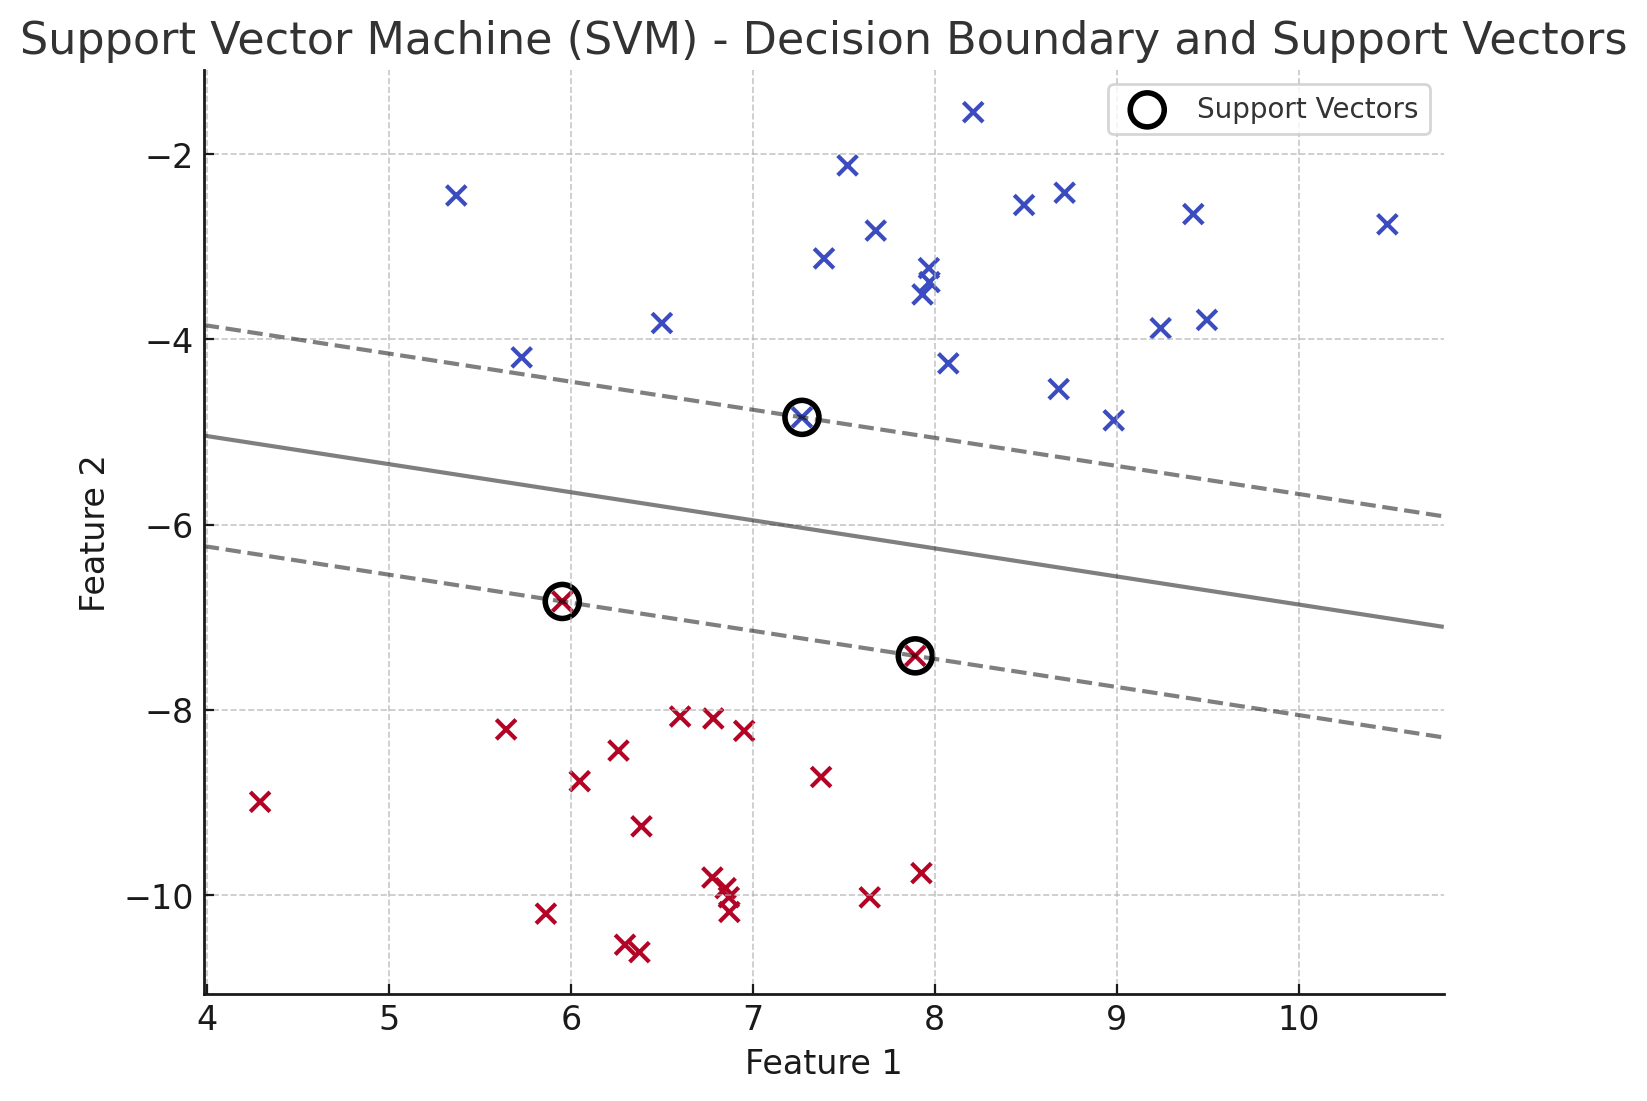


SVCs can perform both linear and non-linear classification: by using a technique called the **kernel trick**, SVCs can implicitly map data into higher-dimensional spaces where a linear separator is possible even if the original data is not linearly separable. Popular kernels include linear, polynomial, and radial basis function (RBF). SVMs are particularly effective in high-dimensional spaces and are robust against overfitting, especially when the number of dimensions exceeds the number of samples. 



In [16]:
model = SVC(
    kernel='linear',    # Kernel type: 'linear', 'poly', 'rbf', or 'sigmoid'
    random_state=seed
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred[:10]

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 1])

**Regularization** in SVC (and machine learning in general) helps control model complexity by adding a penalty for being too complex, making the model more general and less prone to overfitting.

![types-of-data-img](img/kernel_trick.png)

### Naive Bayes

<code>[GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)</code>, <code>[MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)</code>, and <code>[BernoulliNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html)</code> are implementations of the **Naive Bayes** algorithm, a family of probabilistic classifiers based on applying **Bayes' Theorem** with the assumption that features are conditionally independent given the class label.

**Naive Bayes** is a family of simple and powerful supervised learning algorithms based on applying **Bayes' Theorem** with a strong assumption that features are **independent** given the class label (this is the "naive" part). Despite this strong and often unrealistic assumption, Naive Bayes classifiers perform surprisingly well in many practical applications. In simple words: *Naive Bayes uses probability rules to guess the most likely class, assuming each feature contributes independently to the result.*

Bayes' Theorem describes the probability of a class given the observed features:

$$
P(\text{Class} \mid \text{Features}) = \frac{P(\text{Features} \mid \text{Class}) \times P(\text{Class})}{P(\text{Features})}
$$

In Naive Bayes, because features are assumed to be independent, the joint probability is computed as:

$$
P(\text{Features} \mid \text{Class}) = P(\text{Feature}_1 \mid \text{Class}) \times P(\text{Feature}_2 \mid \text{Class}) \times \cdots \times P(\text{Feature}_n \mid \text{Class})
$$

The model predicts the class with the highest posterior probability.

There are different types of Naive Bayes classifiers based on the nature of the feature distributions, such as:
- **Gaussian Naive Bayes**: assumes features follow a normal (Gaussian) distribution.
- **Multinomial Naive Bayes**: used for discrete counts (e.g., text data - word counts).
- **Bernoulli Naive Bayes**: used for binary/boolean features.


In [17]:
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred[:10]

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0])

# Model Evaluation

The model evalution process in this lab are mainly divided into three sections, where each of them are breifly explained below:

1. <code>[Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)</code>: A table that summarizes the performance of a classification model by showing the counts of true positive, true negative, false positive, and false negative predictions.

2. **Accuracy, Precision, Recall, F1-Score** : 
    - <code>[Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)</code>: The proportion of correct predictions out of all predictions made.
    - <code>[Precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)</code>: The proportion of true positive predictions out of all positive predictions made (true positives / (true positives + false positives)).
    - <code>[Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)</code>: The proportion of true positive predictions out of all actual positive instances (true positives / (true positives + false negatives)).
    - <code>[F1-Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)</code>: The harmonic mean of precision and recall, providing a balance between the two.

3. **ROC Curve and AUC**: 
    - <code>[ROC Curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)</code>: A graphical representation of the true positive rate (sensitivity) against the false positive rate (1 - specificity) at various threshold settings.
    - <code>[AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)</code> (Area Under the Curve): A single scalar value that summarizes the performance of the model across all thresholds. AUC values range from 0 to 1, with higher values indicating better model performance.


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=seed)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 1. Confusion Matrix

Before diving into individual metrics, it's essential to understand the confusion matrix, which provides a comprehensive view of the model's performance. The confusion matrix is a fundamental tool in classification tasks, allowing us to visualize the performance of our model in a structured way and familiarize with the key terms used in classification evaluation.

A confusion matrix is a table that is used to evaluate the performance of a classification model. It presents a summary of the predictions made by the model compared to the actual values. The matrix has four key components:

* **True Positives (TP)**: The model correctly predicted the positive class.
* **True Negatives (TN)**: The model correctly predicted the negative class.
* **False Positives (FP)**: The model incorrectly predicted the positive class (Type I error).
* **False Negatives (FN)**: The model incorrectly predicted the negative class (Type II error).

The confusion matrix helps us understand:
- Where our model is getting confused
- The types of errors our model is making
- Whether certain classes are being misclassified more often than others

## Confusion Matrix Layout
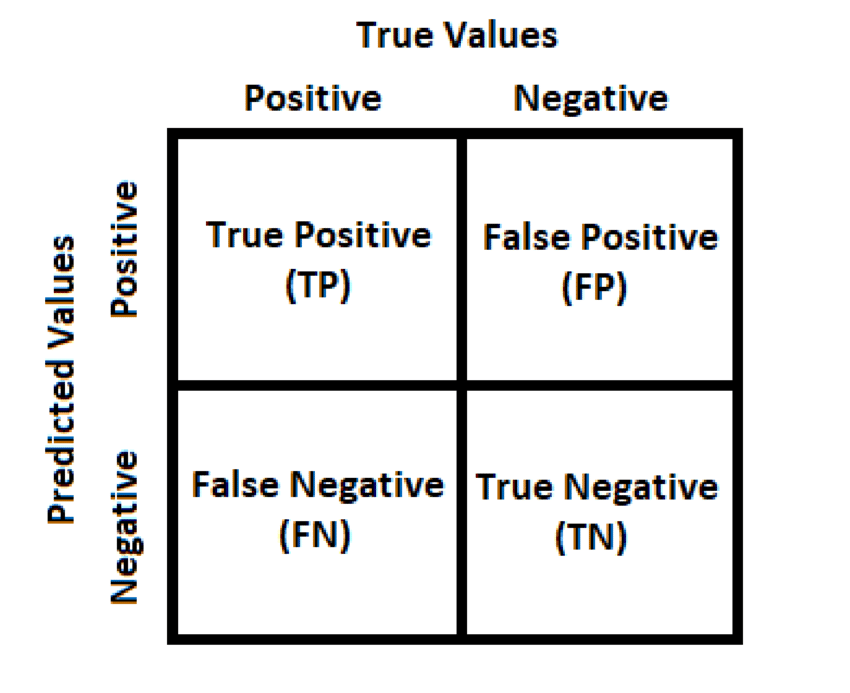



Confusion Matrix:
[[57  7]
 [ 7 18]]


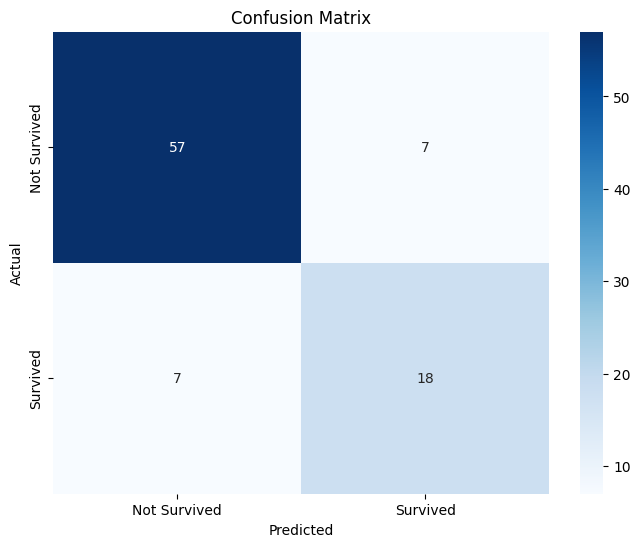

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The visualization of this matrix helps to clearly see where the model is performing well and where it needs improvement. And as you can see, the diagonal elements (TP and TN) represent correct predictions, while the off-diagonal elements (FP and FN) represent incorrect predictions. 

## 2. Accuracy, Precision, Recall, F1-Score

### Accuracy 
Accuracy is the simplest and most intuitive metric for evaluating classification models. It measures the proportion of correct predictions made by the model out of all predictions. 
It is calculated as:
$$
\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Predictions}}
$$

### Precision
Precision is a measure of the accuracy of positive predictions. It indicates how many of the predicted positive instances were actually positive.
It is calculated as:
$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$$
For example, in a spam detection system, precision tells us how many of the emails classified as spam were actually spam. 
A high precision indicates that the model has a low false positive rate, meaning it makes fewer mistakes in classifying negative instances as positive.
### Recall
Recall, also known as sensitivity or true positive rate, measures the model's ability to identify all relevant instances. It indicates how many of the actual positive instances were correctly predicted by the model.
It is calculated as:
$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$
For example, in a spam detection system, recall tells us how many of the actual spam emails were correctly classified as spam.
A high recall indicates that the model has a low false negative rate, meaning it misses fewer positive instances.
### F1-Score
The F1-score is the harmonic mean of precision and recall. It provides a single score that balances both precision and recall, making it useful when dealing with imbalanced datasets where one class is more prevalent than the other.
It is calculated as:
$$
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$
The F1-score ranges from 0 to 1, with 1 being the best possible score. It is particularly useful when the cost of false positives and false negatives is not equal, as it provides a more comprehensive evaluation of the model's performance.

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve

In [21]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

Accuracy: 0.84
Precision: 0.72
Recall: 0.72
F1-Score: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        64
           1       0.72      0.72      0.72        25

    accuracy                           0.84        89
   macro avg       0.81      0.81      0.81        89
weighted avg       0.84      0.84      0.84        89



# 3. ROC Curve and AUC

ROC (Receiver Operating Characteristic) Curve and AUC (Area Under the Curve) are important evaluation metrics for classification models, particularly when dealing with binary classification problems.

**The ROC curve is a graphical representation of the model's performance across different classification thresholds, while AUC quantifies the overall performance of the model.**

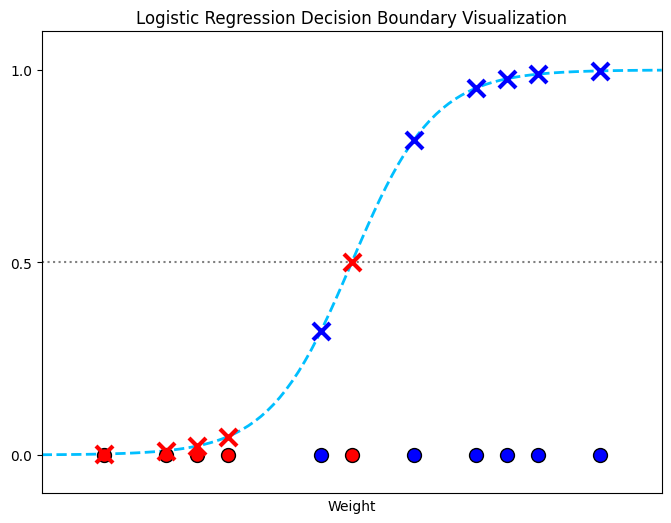

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x_example = np.linspace(0, 10, 100)
y_example = 1 / (1 + np.exp(-1.5 * (x_example - 5)))  # sigmoid function

# Classification threshold
threshold = 0.5

# Points (weights) and their true class (0: red, 1: blue)
weights = np.array([1, 2, 2.5, 3, 4.5, 5, 6, 7, 7.5, 8, 9])
labels =     np.array([0, 0,   0,   0, 1,   0, 1, 1,   1, 1, 1])  # true labels

# Predict using sigmoid
pred_probs = 1 / (1 + np.exp(-1.5 * (weights - 5)))

# Colors for plotting
colors = np.where(labels == 0, 'red', 'blue')

# Plotting
plt.figure(figsize=(8, 6))

# Plot the sigmoid curve
plt.plot(x_example, y_example, linestyle='dashed', color='deepskyblue', linewidth=2)
plt.axhline(threshold, color='gray', linestyle='dotted')

# Plot the original points along the x-axis
for i in range(len(weights)):
    plt.scatter(weights[i], 0, color=colors[i], edgecolor='black', s=100, zorder=3)
    plt.scatter(weights[i], pred_probs[i], marker='x', color=colors[i], s=150, linewidth=3, zorder=4)

plt.xlabel("Weight")
plt.ylabel("")
plt.yticks([0, 0.5, 1])
plt.xticks([])
plt.grid(False)
plt.ylim(-0.1, 1.1)
plt.xlim(0, 10)
plt.title("Logistic Regression Decision Boundary Visualization")
plt.show()


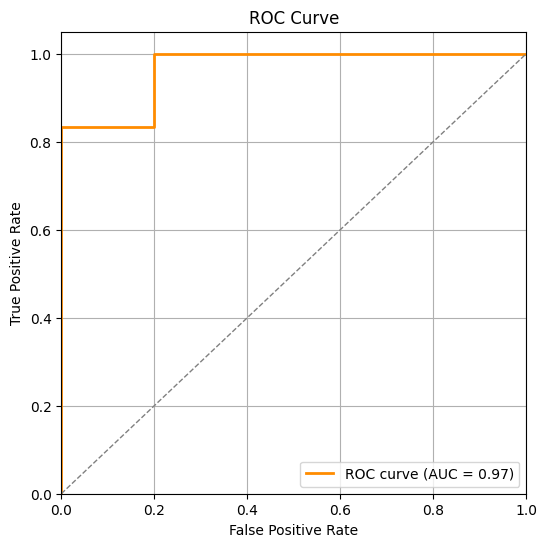

In [23]:
from sklearn.metrics import roc_curve, auc

# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(labels, pred_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## ROC Curve

The ROC curve is a graphical representation that shows the performance of a classification model at all classification thresholds. It plots:

* **True Positive Rate (Sensitivity)** on the y-axis: The proportion of actual positives correctly identified. ($ \text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}} $.)
* **False Positive Rate (1-Specificity)** on the x-axis: The proportion of actual negatives incorrectly classified as positive. ($ \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}} $.)

The ROC curve illustrates the trade-off between sensitivity and specificity. By adjusting the classification threshold, we can increase one at the expense of the other.

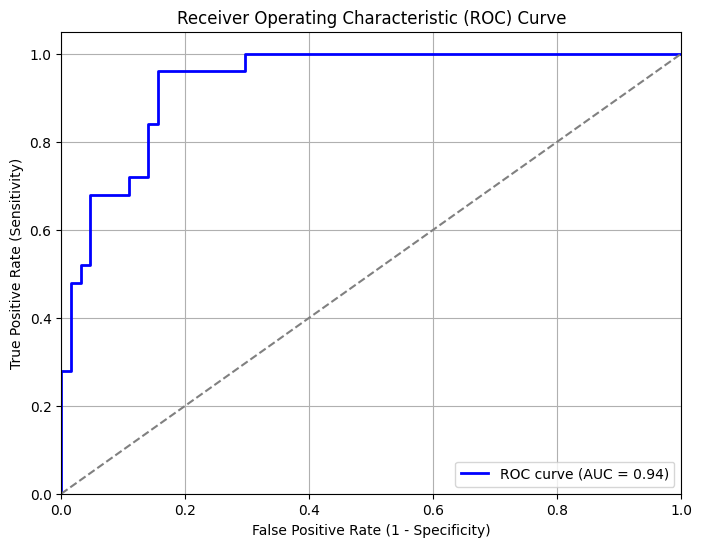

In [24]:
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## AUC (Area Under the Curve)

AUC provides a single scalar value that measures the overall performance of a binary classifier across all possible classification thresholds. AUC ranges from 0 to 1, where:

* **AUC = 1.0**: Perfect classifier
* **AUC = 0.5**: No better than random guessing (diagonal line on ROC plot)
* **AUC < 0.5**: Worse than random guessing

The higher the AUC, the better the model's ability to distinguish between positive and negative classes.

# Model Tuning - Grid Search

Model tuning is the process of optimizing the performance of a machine learning model by adjusting its hyperparameters. Hyperparameters are parameters that are not learned from the data but are set before the learning process begins.
Hyperparameters control the behavior of the learning algorithm, and finding the optimal values can significantly improve model performance. The most common technique for hyperparameter tuning is **grid search**, which systematically explores a predefined set of hyperparameter values to find the best combination. It trains a model for each combination of hyperparameters and selects the combination that produces the best performance.

In [25]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'saga'],  # Solver algorithms
    'max_iter': [100, 200, 300]  # Maximum iterations
}

# Initialize the model
log_reg = LogisticRegression(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    n_jobs=-1  # Use all available cores
)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

,estimator,LogisticRegre...ndom_state=42)
,param_grid,"{'C': [0.01, 0.1, ...], 'max_iter': [100, 200, ...], 'solver': ['liblinear', 'saga']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [26]:
# Print best parameters and score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print("Test Accuracy of Tuned Model:", accuracy_score(y_test, y_pred))


Best Parameters: {'C': 0.01, 'max_iter': 100, 'solver': 'saga'}
Best Cross-Validation Score: 0.8011187693537108
Test Accuracy of Tuned Model: 0.8426966292134831


## Cross-Validation

Cross-validation is a technique to evaluate model performance by partitioning the original data into training and testing sets multiple times. It provides a more robust assessment of model performance than a single train-test split.

[Cross Validation](https://medium.com/@ompramod9921/cross-validation-623620ff84c2)

### K-Fold Cross-Validation

In k-fold cross-validation, the data is divided into k subsets (or folds). The model is trained k times, each time using a different fold as the test set and the remaining folds as the training set.

![types-of-data-img](img/cross-validation.png)

#### Benefits of Cross-Validation

- Makes better use of the available data
- Provides a more reliable estimate of model performance
- Helps detect overfitting
- Reduces the variance of the performance estimate

In [28]:
y

0      0
1      1
2      1
3      1
4      0
      ..
882    0
883    1
884    0
885    1
886    0
Name: Survived, Length: 887, dtype: int64

In [29]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print the results
print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


Cross-Validation Scores: [0.76404494 0.80337079 0.78531073 0.79661017 0.82485876]
Mean CV Score: 0.7948390782708055
Standard Deviation: 0.02008071700272691


### Stratified K-Fold

For imbalanced datasets, stratified k-fold ensures that each fold maintains the same proportion of class labels as the original dataset.

![types-of-data-img](img/stratified-cross-validation.png)

In [31]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

cv_scores = []

for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    model = LogisticRegression(random_state=seed)
    model.fit(X_train_fold, y_train_fold)
    score = model.score(X_test_fold, y_test_fold)
    cv_scores.append(score)

print("Stratified K-Fold Cross-Validation Scores:", cv_scores)
print("Mean:", sum(cv_scores) / len(cv_scores))

Stratified K-Fold Cross-Validation Scores: [0.8146067415730337, 0.7752808988764045, 0.7909604519774012, 0.7740112994350282, 0.8305084745762712]
Mean: 0.7970735732876277
